<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-toro-sal/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Juan Felipe Toro Salgado -- A01794247
# Reduccion de dimenciones 10/26/2022
# Ciencia y analítica de datos (TC4029.10)
# Dra. María de la Paz Rico Fernández

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.dot(np.dot(W, D), Winv).astype(float)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [ ]:


#Matriz 1
# define la matriz
A0 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A0)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A0)
print(values) #D
print(vectors) #W
#Ejemplo de reconstrucción
values, vectors = np.linalg.eig(A0)
W0 = vectors
Winv0 = np.linalg.inv(W0)
D0 = np.diag(values)

print("-------Matriz reconstruida-------")

B= np.dot(np.dot(W0, D0), Winv0).astype(float)
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.00000000e+00  3.36536354e-16  2.00000000e+00]
 [ 3.00000000e+00  9.99200722e-16 -2.00000000e+00]
 [ 1.11022302e-16  1.00000000e+00  1.00000000e+00]]
-----------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


In [ ]:
#Matriz 2
# define la matriz
A1 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A1)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A1)
print(values) #D
print(vectors) #W
#Ejemplo de reconstrucción
values, vectors = np.linalg.eig(A1)
W1 = vectors
Winv1 = np.linalg.inv(W1)
D1 = np.diag(values)

print("-------Matriz reconstruida-------")

B1= np.dot(np.dot(W1, D1), Winv1).astype(float)
print(B1)
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 7.41483138e-17 7.08397389e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
-----------------------------


In [ ]:
#Matriz 3
# define la matriz
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A2)
print(values) #D
print(vectors) #W
#Ejemplo de reconstrucción
values, vectors = np.linalg.eig(A2)
W2 = vectors
Winv2 = np.linalg.inv(W2)
D2 = np.diag(values)

print("-------Matriz reconstruida-------")

B1= np.dot(np.dot(W2, D2), Winv2).astype(float)
print(B1)
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 7.41483138e-17 7.08397389e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


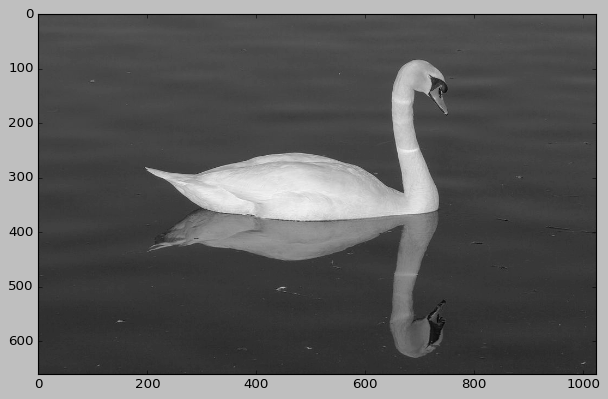

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F7623520FD0>


In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
U.shape

In [ ]:
V.shape

(1024, 1024)

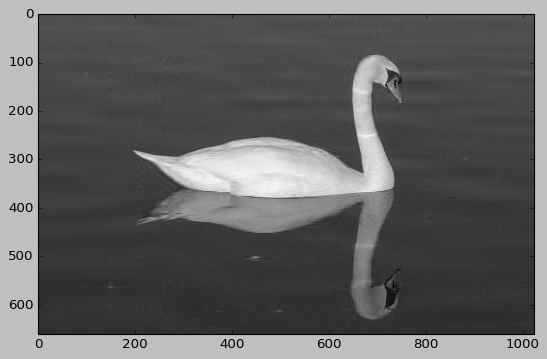

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[255. 255. 255. ... 255. 255. 255.]


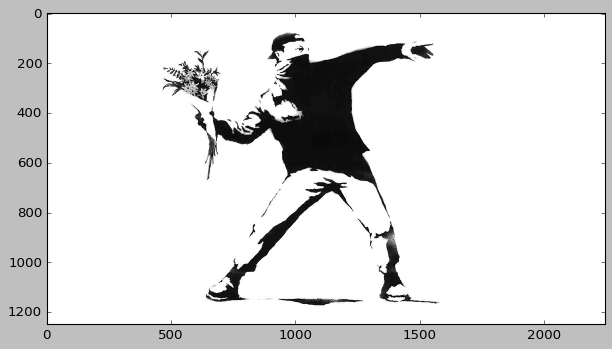

<PIL.Image.Image image mode=LA size=2244x1247 at 0x7F76264B4390>


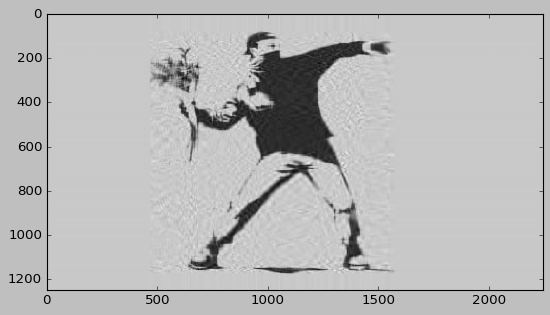

In [ ]:
#imagen 1
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://images.squarespace-cdn.com/content/v1/53a9aeede4b0306c907ad4ab/1583855596105-HSO2O1C5V9IZ3BYJ2S0D/Banksy+Portrait.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)
U,D,V = np.linalg.svd(imgmat)
imgmat.shape
U.shape
V.shape
nvalue = 40
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()


[211. 210. 211. ...  41.  41.  40.]


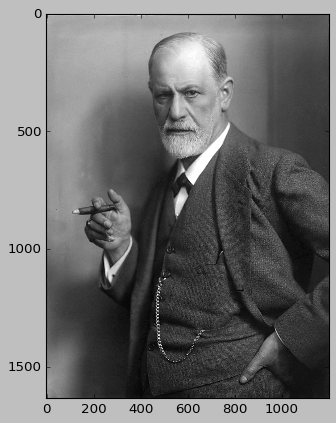

<PIL.Image.Image image mode=LA size=1200x1632 at 0x7F7623837090>


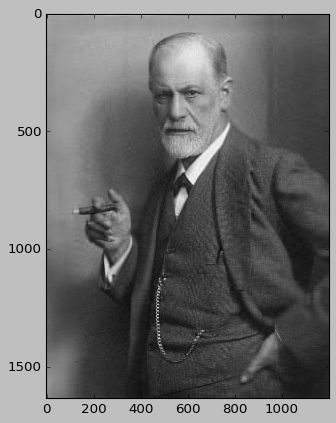

In [ ]:
#imagen 2
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Sigmund_Freud%2C_by_Max_Halberstadt_%28cropped%29.jpg/1200px-Sigmund_Freud%2C_by_Max_Halberstadt_%28cropped%29.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)
U,D,V = np.linalg.svd(imgmat)
imgmat.shape
U.shape
V.shape
nvalue = 60
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()


[24. 98. 98. ... 92. 95. 16.]


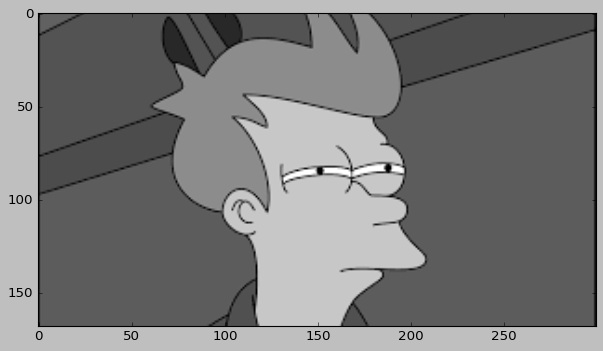

<PIL.Image.Image image mode=LA size=300x168 at 0x7FE95B7D5A10>


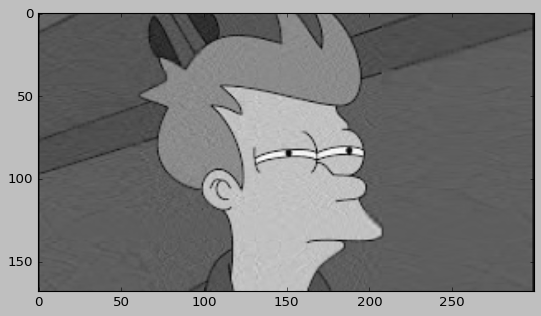

In [ ]:
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACoCAMAAABt9SM9AAABd1BMVEVHYYL/tZLrch80Xm49TmoWMjWsKipJY4UMEhf///8AAAD/u5f/uZU2YXFSY48/UG0RGCANFxzzdiAPFBv1dyCzLCwUGCMoSlYAABQAAAv/vpmhTA0tUV/mbx3yrIsxWWg3RmAGAADKkXbbm302UnFMW4QQJigZLDQAKTguO1AjKDwAN0Y4R2EoM0XPYxjcaholAAB2NAAAAB5ONyyJYU5haGumdl8dJTIEEhATISYdNz9LHQAlQk1eKQCIPwQKGRoAHy49GgAAHzbCXRUQLUQZCACrUQ8AFCmURAO2g2yacF1pT0MvKigeFRF4VUXVl3rZ29tES01AKRkoAAAzAAAoLURGHQAADx8tEQAmDQCAOgAAMD9oLgAAKC0AHCQAKD4eHh45DgBxVEc8MCsvIx8AFi4sGw9dPix5TzpfOSaLXEY/IhKOk5S6vb7f4eItMTNyeHqnqqxPV1mAVD5iQjBYDACYJCJ3GRVFAQBVAws6AABVFRWGHhtbDCcsAAATCUlEQVR4nOWd60PayBbAAbtCJ8llTaEIaOR1q1wtSsH0gVoVoYBVqt3ro7o+qrXW1W4f1u7e7R9/Z/IigQCZPCbb7vmwS4GkmV/POXPOmTmD5+6/dOTf/x2KDJgTMCa9GAE/qeXeY8bA1cxknPXJMloZ03m/vI35RAwz8iTwMHvLqgQDHh1Y//7PowhjZGgtGZO/zkRkKMz4PQ2tp0+M3HJsKaTA8uWirQ8qMiy2PIzxYIgUeJgNBi2z0oVlAtVAAMwptB5H5Jda1foJjBgZ3OJ0CxZbXVRuO1FWaFW3DT4eIvXobvaWHaj0YJlBxTx5+hNQEI0BWbXmnuIbIjNZa9mhL5SflK8ZmVfeZ+OLRu5kKykdWAIqPFLosZAKKb6KeSLbGxMwoVpjJRUsH7srX8Nst1Qu9Gqyz1MyzJi9pDpgmUMF3RTSoHtDyqVdffy4EYUY9qklNyyTV7v+UKnXgwqk7ty3lVQbLJOoFE/+SHZbah//WKtaRmBNlNWw2PiedNHYlkrlRpNj3a5nxuae3rk/ZTMpDSwzvkp+PMnagPLGkGJvWtV6ZMAOmTm104K0SiPiY6ntEAUQeg8rkAo4QUoFywKqFpGWlbV8fERD656R6EHlyQWZluIHZrKqZrjQ4bbgAOYeRx0ihWwaIFimDVAa3SPZyhQfP66YpCbYMua0drSw2PiEeNVIXuP6dzRqKpBK/ifhjE4Fg4n7gTsQlkVUAwMRGZYqNlBMUmuIhoIHrYdH3lwyxN2Q+u2cyhCZgYiDpG5lH4KHCY8/4AFPraGCsJRwSokNmLlxxRAf4cJSh6VqQ2S2RzUaJ8cPkNQ9OBiHSE3d/zlw/5bH70ewhsz7qg5YLdVq+XiNIQqfMxrphLVXboMlGSIzkdO+D0RS4w6RQsb3MPBzNuOHpKAIsCyyUsFShZ0jgZZJqn0WnK8ikxOL23egbC8u7k1GRga0yLSOXKS1hQyx/QO2useMjNuU+HWSEoxvyiOCsg9Wy9BUqtXy8a0Z8enc3CKYr1Vz06M+lvWNTufK1dr+8fDiZGRMIaaJPtWG2PEBuxNwilTi/h1ofP4WKbtgjai8kiqjaYVd45Lq/RpdquVCrDaMQpKrvtoanpgTgTGRhQ5YgiEykVrbB+VlB0JPUaWyHi0pu2CpJzyVaik+XswdfzqI5nNsBwaFma9cK0UnkIbpwIKhKZyGOmCxSwm7SQn+XG18NsPS5Mst1WICLQcGoFblR7uRUgFbWNqenHyl88VRADWrwz6ry/ZplhhMtfy5Q7DU850q1mr5eOYJKE33QSUBC01X53U0SyhtdTozdtc2UtD4kiiY0gdlH6yIum4FWqVg2cczI8PxUOf4u/HSt9XQq8nJcges+IodJVBofHdAuz93BpY2SlenNECCOWNMrfpALA23R6tQohZhif68h/HZDUubAKpUS/DxzGTJOilB5nUcfz5rgRZUqexdbTDlvGaNdFEt5OOZvX0b1Eoko/Ne2ayLl5LjbLC/StkLq5tqDYwMMZO2sdIHWDFHSk6ODYKyEVab12pVrZjxCR3bsRXWArYdCsEUEJNjHLELlrbIB1TvLznLCtcOheTYmD93TrOYOVCJDv0qpYCKao0lR/sP16IkDcNCxmfcnzsHC9La8lX3owda1RrO9R+sRWH3jaU8UnIcNEnKVlgDTBTlK/Gd7V9RdUG4KTPRWT+wH5aBuLR7cuwWLGEJiw2Vl7Yl1WIi88bjdvOS6+O0zPpzR2FFxPyXDVUrB6JqAecdFpIeQbwQTJn0507CGhhISg/P+haiANXSq84bIfrrtnobH14wRQgWs6fAYXNLE8xIiYQRooxHz8MLyXHABuNzBtbA2G5Lk9jatl7a6wisWruHh8ZnNDl2DRazp5r82GkyRgilqoEFje/+XdCl2Pn3gQU9uuZfnBArVQwvJ8c2q5QjsLQb0YiJFDvY7c8dhjUwsOsGrOlnQc3KsVNiM6y2BXZysGByfNch43MO1qLzuaAOrKj55Ng9WEzEHTNcdlilHIDFjE2U3LBCX+6QBCpbSzQDkxUDkRUrip2s2PLK9wULogJxI5HVwsJCrRavlnPTtkFja4nvCRYzsJc0hMrnmz9K1Xm+UVwtHIHj+YVqbjRkFRmbzxBhZQssZmyvEjc6Yja/GqNomkLiTacar0+SW3lryNgdMqxsgAXd+k4VY6ShhRMv7ZUEUfNyqcbq6e5+PDdqDtj0MzJWaBkWNEAsVIhW/LlXKwgZ1+Rfn+7kq9M+XGJsPPt9wGIiABMVGl01wNHeDqGpGNSxAigtlLGAEbNCi7CYuXkzlsOWo3q0RGIUV18/moEqZtCLsWVCUZZlzYrs4isWGmAOcPqwZD+WKp4k5+M5A8EFu0sIlXUzHNirLEzj82JzXXVL0TBvk19dK9XKvd1+KE/KY9kwGzIDc4tLNWxebPl5T1gSMTpdf712DG2ym4qFasvEWNkROjDMHIhCXiEsXmxtNdaXljRRCjZZK/s6Qn6WzRNkZUPogHpmpoK3Vh5sxXtvsG0baahU769bik1SUMWeJ9EOel+IlcVXrZCzQauwUM9MUuoECQanVob3yz3MsbZQi5dV9jQKDLJSVAwaZbFwmjyezy/UqvGF+eEVD0lWFmB19swEg4nlnY5OEkXigOeLJ2vzcWl/KVtrUDi4JGIw4k+nHmQSiUyGSBHLOiymS89MMJHsCostH3ExmA82nm9J8QbAhSUz80b9ZMp91mEJx0qgxnadZeDDHiUtFF3RUDti6SKo+VgfO980B8tLbRIHZQqWQkp/M0bPsrIci9KUtwFxheINoy6+XbV4QuU+K7D6HZbQU7EESxySdcPLB/K1okk79HqBC6xwYKHG9qE+hyUk+3XnVE9kPjSdWjccPHSoVuqBC6plFJahIwCCK30XpEML64o2wQDdrGJ5qQbJaBQHltEjAILD/Rd32FLdtO1paF28IU7LACzjje0JQ+0BoHcKbVRiPHFL7AdLHaT3k+ByeyO4rpSf26JaXqpOmlZPWAyD19heMVaty2NH7voSIx1AdIclBel6oWcXxcrqNaDq0bLJEL3UGVFW3WD1CT2tWCEyxIItqkVTxSnXE2kzpBAs0B+TKKFSygbV4tLeYsZdWGKQbuacroTx9q/pIwzVoruALRROwJspkvm0FpaRIL2rYvWPSBVh88Zjd7rR0MclLGl/HiaoXCpYKPS0cE5X8NCoy4IyGsVQreJp9wmB4jbJL1hIQbqF82+CzzD2ZrGvMNJCqtlr+qTfEqMlwsIJPbugCgYBzoLFaADHa3E9lhm91CYpSxRgRcatkrqVvRvdwoHF7uNMiHR6rYdqcaTqNeiwsYBFUkKPTCaD1wudO8GJtahGj9IXVSe38++OBT+lOr0lg9dkHzpO48Ra1FovQ6wQYSXCMk1K1dDgz+TxFqWrWGVSur7eQ7V4Mj7eLCyxNVt1eos/YzAzVCSJwQoCUa8y0tLWQShCDMaRqT+YgiW4qbZuImzNwnPxXqooBRtoy0i6zp+/g/J6vcinOJqKkcmosWHJhwZ2NDRg+iyYTr+mZBPjtdgUxZFfIPVpoq/TlDd18dvz2curF+/f337/O5i9uvy0dt68IBI94MHSOTSwJSXcjUdJCRFdVCJUYW9WOsVfXKxfFwpngmy+O79IcVQsSVEc/9vvl1e3ZZkFALyH/3/xARDZ3I0Bq8NNtd2p38pOuyhrrFRRNEgIKs2fzzydvfx4dQU5yFTev7i63Kjwa82t3z++v62SDfilF8KrKyLLF0ZhCTFCoFfflf8ZpmIp8yGEhf7rrb8Dsx/Fwd/+CDnMqsHc/hj4pCGFNAqAT9Krvw0s8fiWh51uSnsnnERakNHnCiyKar57fPmixeE9hPVRi+aD/DFUtNmNo7Wzs5NTsDH74ePV+9sviCz19IXV001p7pTA7WJlK4oZNndmVaQgjitoYrOfNjY2Pn34cHklqJTA8ury97NzPpXmhE1btJfjmvWLd0ef7rsPC/VmGz9rA/c8IzYv+Sp+V7GwFx8/bBz9dn7Bp5qcKOkUpFHZuISwrmaTn6GrR5Okeu6Eb5CJSnvA6u+m2m71DPdogqq4MYROid7p6sP4zDmf5qRgQZ4rUfwQg/PgEPicpvQXsamim7Oh5KawerP9Cb0TM3tJblVwWnQawrr6lLxIebvAQF+KFehYt4wnRmYLkh4sw26qXQyvWEjCyqX48RePz7tpjQIEnJ4UOX1c3LA76Y6FLnZ/FtPFKx6+sNmFgkqzuIKXqyd5ve+R2q6lhdXvvNx+EsXr+mVLYplGjkp7wuJ5tGvwWq9WQb5Eo624mLtZYr/nUT0sG9I05MjTobe52rdcI1UdYteda/8UqWV8CZZpN9V2t+WO83xVaKYXjkEAzLe6fdialBRCEn1Ui+LlcP+0XQupZpRcDf6OfHiSHRuAQdfwgX11VOdgRJAuAmUvpbyplK4XehRChS+syS/bFy+oJrEtkxBWwJKbartdZrcbrOOGNNtR3Kp0fDCrVEspPt0bFq8shtFp4EVhqRCZ0pT3YphY5wBasLDzpBv/1JK+Xr2st1p1YnXpQM6y4q77OXjV51QKNBo8z9dTzWZ9PUCwIQXC+tnWv82fONZhFdrXzPnQdEa1sHCE5up1CIsvrr89BW9WyDVa2A4LWmKy8zxzaZMRLed1VDNpHpaYAklFVC71GRwSMkT7YUFaw9W2CCI0I7qcRmE9VU8jQFS9xPpYs7A04Cg6dUZsdcduWPCf+XBeq1xlMY46bXjXTyEw9IfY6zgrZ9KWedHnRCItJ2Ah5YrWVAeIiMEntc7HmgWKijVEdIFpJc6yLLG3JFYsnIEFp9csaOFihaUJbo2i1pA5xlaRt6ebx6G8HTsABUmTOAjDIVjIFrPDealXU6gf0406lS6I8YMQV1Kr5VLvUBRHkt8zLKRdmcMk6gUPCXUr6pSTFwiltXhupmIbK+/a9w0L4fJkVp5VSvsiGxoql2R2gkZRDXt2LQtCoqLlKCx0f5RGJaRNHR1Lz1gbaXpKmsRamNOwRDmTUh3uVHs8gW2sYue3fhRY/gdSGkwVmrbxUQtFpv2QDKzEZ8kOObs6UTSoKD7q9BDEcRAxQ39UihHoJui1hIMjtHhwAWrnPz10fATiMMjAymzKq4DcevJkzXLgjhg163xxvXC6tsoTPJmNACyPf+U81hqndce+vrZWWOeFZXyoXKSawwjB8vgPPxs5p8eoIFtWVvFJbSklBgvSuu7WsWRdwA8Gy+PPnqWVgN2+yF24G7lFVkKwoJd/cJ0W94lyfRZzsGmdkdpTSgoWwvXm7KJe598mbSvNSJImYohEYQmZ9TKop20JtNRC8SS2/pGFhf5C/8qFnfOiTOucwIxIHBbKFJ1IEGkCjXQuwPJ4zuydDCVJOk7LDVj+Zbv9uyAccJqWK5qVsbFC2hLacVquwPI/sDfMUmg5bInuwFqxa72wnVbFUVquwPJkzh1x8VDOnNzj7Q4sT9IhWLTXyQjCHVj+Z444LYFWxblf/3AJ1qEzCxeIVtO5uqlLsLK8Y7UtBw98dQlWxoaNWd1gXTtmhy45+My1Y7AcLJu6BMuz6RQsJ8sPbsFKmivTIE/XvZSPmqwLDlaYXYLlB3iwaGFhlkuLwnFe6Wx4ldDol6E2nzkZwrsFaxhnNqS5erGwljwtXF+vQrlGB9gBsHa2WXj79vp6ff38+vpt4Sz6ZsXOHf16T+0SLJxUmuaTxRSn1aOYNyUsUmRkETY3/YglGty6A623O4ImdACN+qldgmVDvkNX/imw3ljeekSnyfT6qp/anQj+luV9WhSXJPR7marHdqMGnzn4MmMRVizleMVd58FdWArLvrwJv7Tks2jv+Ruyv08kPjnxRVbPwZfwYHjGCiwqTaizqf3ZCcPye8C38KAlWDTVIHlGsPrhycKCrG4gq8Gw+d4Kitt05Ud3POQ1S2Q1GDb7y1feWN0Fzy4J4V00QyIrCMtk1YH+7IZnlx+f6P6sia8Sq0FzsGivayYoPD9BWP6pP0RWg3+FT811kju7iNp3ACQ1CwxKUhk0s9vB+c0MfYTkntIVyQjhXHjz2gQst1kR1awZidVg+OVXE6s75M597yYEt3bvfZOtMPzXn/jrhhS/7TIrkpqVDCuw/gTY22igw/riSo6jEnIdFtmvCqzBb6D3OT16ilX4Fn75T/FZ/oPBltz0+k0KfcVqvoSsXfm9TNUYSMHK/C+sogVwrZA6uYHm+23iHxE6QCtUscLOo+nmL0L+/QeJVujugyDUb+g5uFHD+gPTZ8UK0uWuGiKZHmlPFsyorTD8FXM2TEuXh7/u/di5od+fAF+//aWGNfgNL4KnXssxWvgXF2dE52H5M0NfYBiqdllQjvCqDkBBfXPw48Lyeyb+dxMeDB/faFiFK1gr0nwrRgt/IXLmtP5gnIXlTyS/CdNYUqtY4T9xOlKo5+prCfX46o3GUViZA2iBgvFo/DtyWqsYmpX+RXV1+KtrWY8/8H9gdV8DsrgXLQAAAABJRU5ErkJggg==')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)
U,D,V = np.linalg.svd(imgmat)
imgmat.shape
U.shape
V.shape
nvalue = 60
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




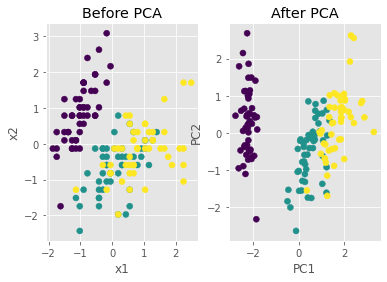

[0.72962445 0.22850762]
[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()
##radio de varianza
print(pca.explained_variance_ratio_)

np.cov(X_new.T)
print(abs( pca.components_ ))

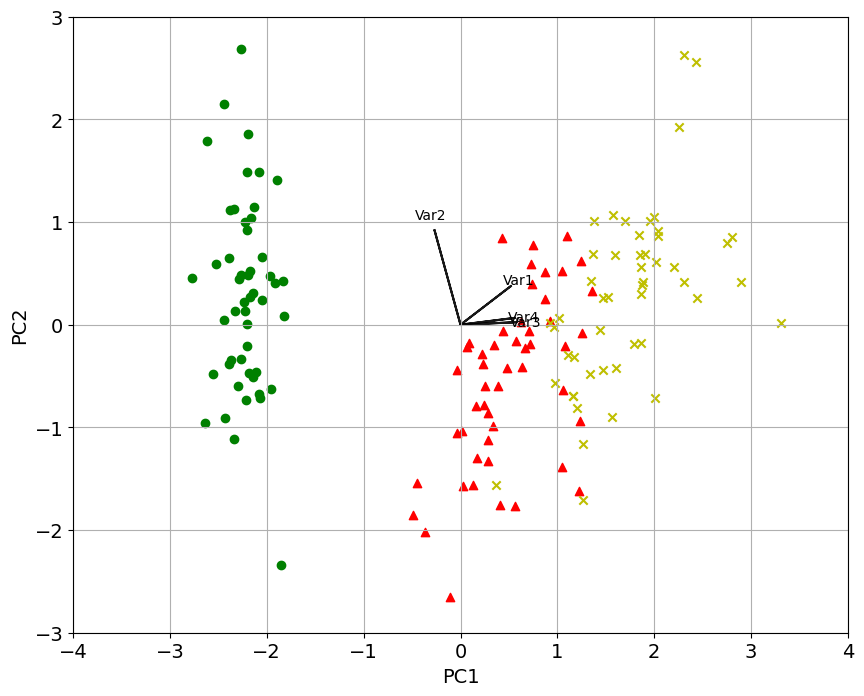

-0.42844010433054014

In [ ]:
def biplot(score, coeff , y):
'
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]

# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]


# Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 
* En el ejercicio permite apreciar  de forma grafica como el  el pca nos permite la reduccion de dimencionalidad sin perder  grandes volumnes de datos.

* las flechas (variables/características) que apuntan en la misma dirección indican correlación entre las variables que representan, mientras que las flechas que apuntan en direcciones opuestas indican un contraste entre las variables que representan.



# ¿Qué es feature importance y para que nos sirve?
Feauture importance  nos muestra que de acuerdo al valor obsoluto de los e eigenvectores en donde a mayor magnitud tiene mayor importacia, con esto  se puede identificar el feature mas importante de acuardo con el componentes principales.

# ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?
uno de los hayasgos mas importantes del ejercicio fue el  poder  ver como se aplica  toda la teoria  para  poder comprimir varias imagenes ,ya que se puede ver una aplicabilidad real del la reduccion de dimeciones , ademas el poder  ver la demostracion matemetica detras de la definicion  textual.

# ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?


*   Se recomienda realizar pca cuando se tienen un gran volumen de datos debido a que este metodo nos permite simplificar la complejidad de los espacios muestrales
*   Se recomienda utilizar cuando se nesecita vizualizar la relacion entre varias variables de datos 
* Se utiliza para la reduccion de dimenciones del modelo ahorrando asi tiempo de procesamiento.
* Permite encontrar patrones en grandes volumenes de datos  


